In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = "/content/sales_predictions_2023.csv"

In [ ]:
df = pd.read_csv(filename)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. ¿Cuántas filas y columnas hay?

In [ ]:
df.shape

(8523, 12)

2. ¿Cuáles son los tipos de datos de cada variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. ¿Hay duplicados? Si es el caso, elimínelos.

In [ ]:
duplicados = df.duplicated()
duplicados.sum()

0

4. Identifique los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decida qué hacer con los valores faltantes y cómo hacerlo. (Esto requiere de su criterio, así que explique cada elección).

- La columna "Item_Weight" presenta 1463 valores faltantes.
La columna "Item_Identifier" es la única que puede relacionar los datos directamente con la columna "Item_Weight". Por lo tanto, para completar los datos faltantes, hice una imputación con .groupby() utilizando la media de "Item_Weight" por cada identificador de artículo ("Item_Identifier").


In [ ]:
df.groupby("Item_Identifier")["Item_Weight"].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [ ]:
df.groupby("Item_Identifier")["Item_Weight"].transform("mean")

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:
df["Item_Weight"].fillna(df.groupby("Item_Identifier")["Item_Weight"].transform("mean") , inplace = True)

In [ ]:
df["Item_Weight"].isna().sum()

4

In [ ]:
df.dropna(subset=["Item_Weight"] , inplace = True)

In [ ]:
df["Item_Weight"].isna().sum()

0

- La columna "Outlet_Size" presenta 2410 valores faltantes. Para completar los datos de la columna "Outlet_Size" hice una imputación con .groupby() utilizando la columna "Outlet_Type" ya que su información permite que los datos estén más completos.

In [ ]:
df.groupby("Outlet_Type")['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           527
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          932
Name: count, dtype: int64

In [ ]:
df['Outlet_Size'].fillna(df.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x: x.value_counts().index[0]), inplace=True)

In [ ]:
df["Outlet_Size"].isna().sum()

0

6. Confirme que no hay valores faltantes después de tratarlos.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)

In [ ]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
df["Item_Fat_Content"].replace("LF" , "Low Fat" , inplace = True)
df["Item_Fat_Content"].replace("low fat" , "Low Fat" , inplace = True)
df["Item_Fat_Content"].replace("reg" , "Regular" , inplace = True)
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

8. Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)

In [ ]:
estadisticas_resumidas = df[["Item_Weight", "Item_Outlet_Sales" , "Outlet_Establishment_Year"]].describe().round(2)
estadisticas_resumidas

,Item_Weight,Item_Outlet_Sales,Outlet_Establishment_Year
count,8519.00,8519.00,8519.00
mean,12.88,2181.19,1997.84
std,4.65,1706.51,8.37
min,4.56,33.29,1985.00
25%,8.78,834.25,1987.00
50%,12.65,1794.33,1999.00
75%,16.85,3100.63,2004.00
max,21.35,13086.96,2009.00


- Histogramas para ver las distribuciones de las diversas características en el conjunto de datos.

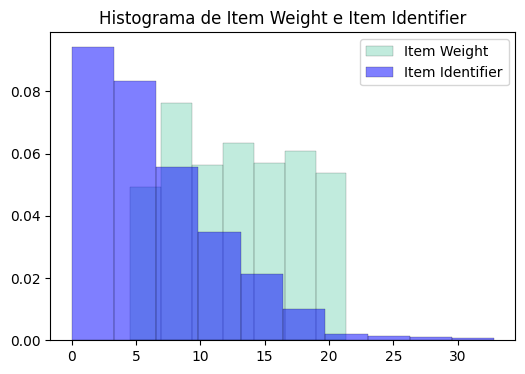

In [ ]:
plt.figure(figsize=(6 , 4))
weight = df["Item_Weight"]
identifier = df["Item_Visibility"]*100
plt.hist(weight , bins=7 , color="mediumaquamarine"  , lw=0.3 , label="Item Weight" , density=True , alpha= 0.4 , edgecolor="black")
plt.hist(identifier , bins=10, color="blue", lw=0.3 , label="Item Identifier" , density=True , alpha= 0.5 , edgecolor="black")
plt.title("Histograma de Item Weight e Item Identifier")
plt.legend()
plt.show()

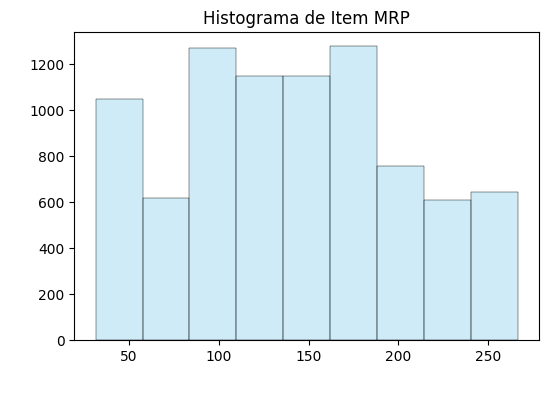

In [ ]:
plt.figure(figsize=(6 , 4))
mrp = df["Item_MRP"]
sns.histplot(mrp , bins=9 , color="skyblue" , lw=0.3 , alpha= 0.4 , edgecolor="black")
plt.title("Histograma de Item MRP")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

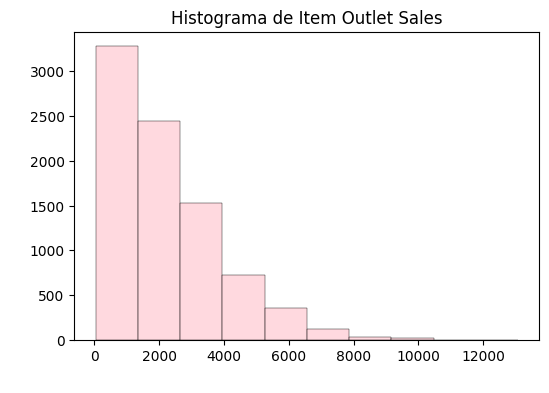

In [ ]:
plt.figure(figsize=(6 , 4))
o_sales = df["Item_Outlet_Sales"]
sns.histplot(o_sales , bins=10 , color="pink" , lw=0.3 , alpha= 0.6 , edgecolor="black")
plt.title("Histograma de Item Outlet Sales")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

- Boxplot para ver resúmenes estadísticos de diversas características del conjunto de datos.

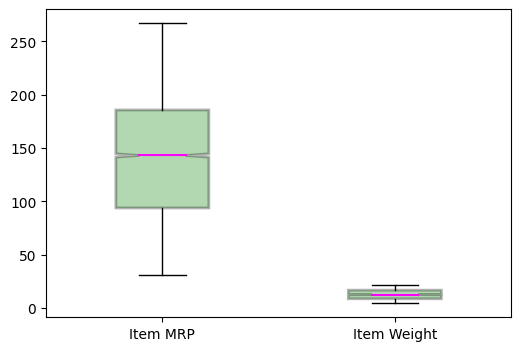

In [ ]:
mrp = df["Item_MRP"]
weight = df["Item_Weight"]
fig, axes = plt.subplots(figsize = (6,4))
plt.boxplot([mrp , weight] , labels = ["Item MRP" , "Item Weight"] , widths = 0.4, notch = True, patch_artist=True ,
            medianprops = dict(linestyle='-', linewidth=1.5, color="magenta"),
                               boxprops = dict(linestyle='-', linewidth=2, facecolor ="green" , alpha = 0.3));
plt.show()

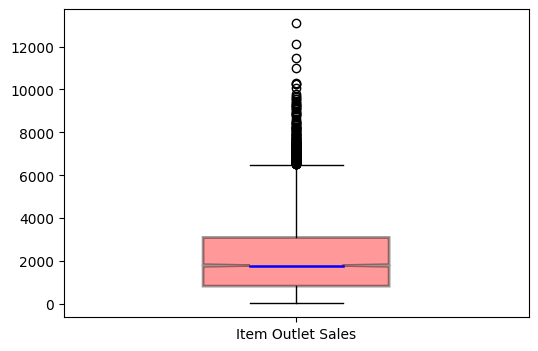

In [ ]:
o_sales = df["Item_Outlet_Sales"]
fig, ax = plt.subplots(figsize = (6,4))
plt.boxplot([o_sales] , labels = ["Item Outlet Sales"] , widths = 0.4, notch = True, patch_artist=True ,
            medianprops = dict(linestyle='-', linewidth=1.8, color="blue"),
                               boxprops = dict(linestyle='-', linewidth=2, facecolor ="red" , alpha = 0.4));
plt.show()

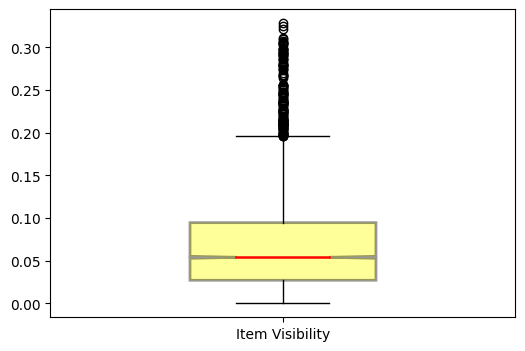

In [ ]:
visibility = df["Item_Visibility"]
fig, ax = plt.subplots(figsize = (6,4))
plt.boxplot([visibility] , labels = ["Item Visibility"] , widths = 0.4, notch = True, patch_artist=True ,
            medianprops = dict(linestyle='-', linewidth=1.8, color="red"),
                               boxprops = dict(linestyle='-', linewidth=2, facecolor ="yellow" , alpha = 0.4));
plt.show()

- Mapa de calor de correlación entre las características.


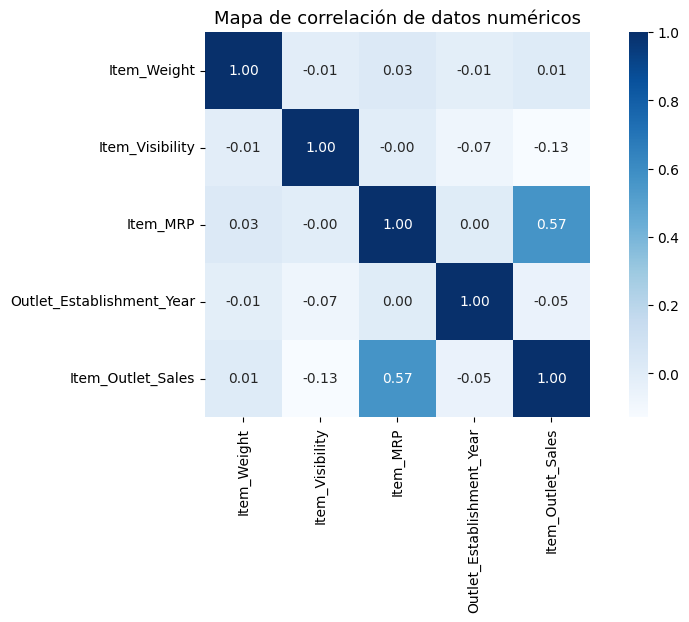

In [ ]:
numeros_df = df.select_dtypes(include="number")
mapa_correlacion = numeros_df.corr()

plt.figure(figsize=(10 , 5))
sns.heatmap(mapa_correlacion, annot=True , square=True , cmap="Blues", fmt="0.2f")
plt.title("Mapa de correlación de datos numéricos" , fontsize = 13)
plt.show()